<a href="https://colab.research.google.com/github/YUVARAJKUNCHALA/assignment3_pds/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/content/diabetes.csv")

# Set seed for reproducibility
np.random.seed(42)

# Take a random sample of 25 observations
sample_25 = df.sample(n=25, random_state=42)


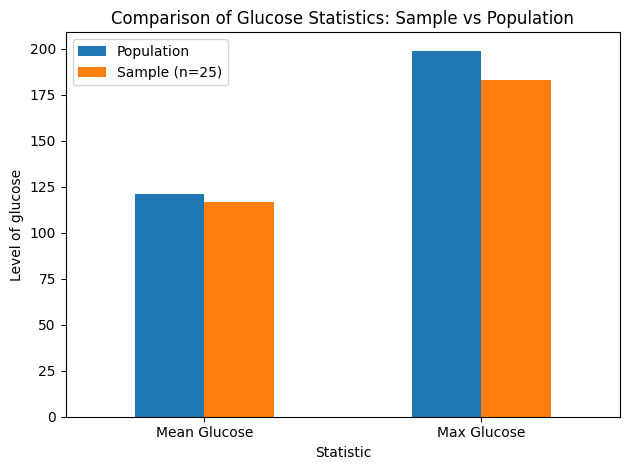

In [11]:
#Q1
pop_mean = df['Glucose'].mean()
pop_max = df['Glucose'].max()

sample_mean = sample_25['Glucose'].mean()
sample_max = sample_25['Glucose'].max()

comparison_df = pd.DataFrame({
    'Statistic': ['Mean Glucose', 'Max Glucose'],
    'Population': [pop_mean, pop_max],
    'Sample (n=25)': [sample_mean, sample_max]
})

# Plot comparison
fig, ax = plt.subplots()
comparison_df.set_index('Statistic').plot(kind='bar', ax=ax)
plt.title('Comparison of Glucose Statistics: Sample vs Population')
plt.ylabel('Level of glucose')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

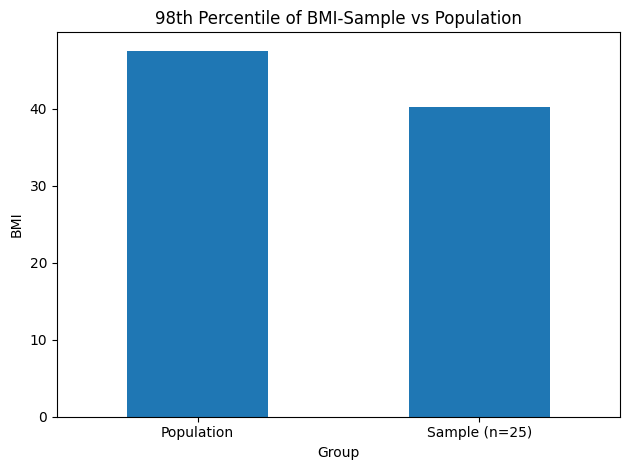

In [12]:
#Q2
pop_bmi= np.percentile(df['BMI'], 98)
sample_bmi= np.percentile(sample_25['BMI'], 98)

# Create DataFrame for comparison
bmi_percentile_df = pd.DataFrame({
    'Group': ['Population', 'Sample (n=25)'],
    '98th Percentile BMI': [pop_bmi, sample_bmi]
})

# Plotting
fig, ax = plt.subplots()
bmi_percentile_df.set_index('Group').plot(kind='bar', ax=ax, legend=False)
plt.title('98th Percentile of BMI-Sample vs Population')
plt.ylabel('BMI')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

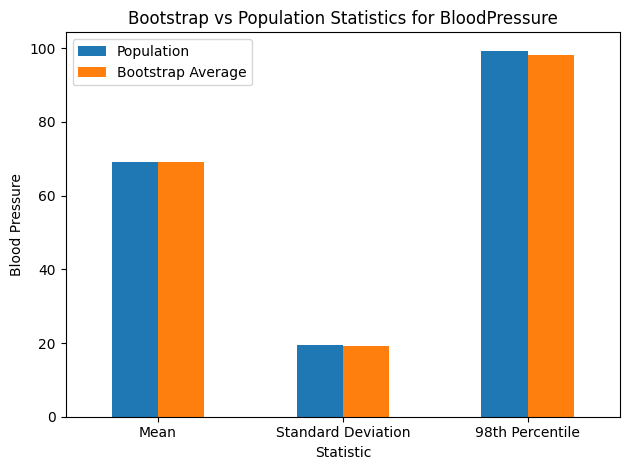

In [14]:
#Q3
bootstrap_mean = []
bootstrap_std = []
bootstrap_98th = []

for _ in range(500):
    sample = df['BloodPressure'].sample(n=150, replace=True)
    bootstrap_mean.append(sample.mean())
    bootstrap_std.append(sample.std())
    bootstrap_98th.append(np.percentile(sample, 98))

# Calculate average of the bootstrap statistics
avg_bootstrap_mean = np.mean(bootstrap_mean)
avg_bootstrap_std = np.mean(bootstrap_std)
avg_bootstrap_percentile = np.mean(bootstrap_98th)

# Population statistics
pop_mean = df['BloodPressure'].mean()
pop_std = df['BloodPressure'].std()
pop_98th = np.percentile(df['BloodPressure'], 98)

# Combine all results in a DataFrame for plotting
bp_stats_df = pd.DataFrame({
    'Statistic': ['Mean', 'Standard Deviation', '98th Percentile'],
    'Population': [pop_mean, pop_std, pop_98th],
    'Bootstrap Average': [avg_bootstrap_mean, avg_bootstrap_std, avg_bootstrap_percentile]
})

# Plot the comparison
fig, ax = plt.subplots()
bp_stats_df.set_index('Statistic').plot(kind='bar', ax=ax)
plt.title('Bootstrap vs Population Statistics for BloodPressure')
plt.ylabel('Blood Pressure')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()